In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# Path to the directory containing CSV files
csv_directory = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack'
# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df['Value'])

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df["LeakType"] = "Circumferential Crack"

# Rename columns
df = df.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [4]:
# Path to the directory containing CSV files
csv_directory1 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Gasket Leak'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory1) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory1, file)
    df1 = pd.read_csv(file_path)
    dataframes.append(df1['Value'])

# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df1["LeakType"] = "Gasket Leak"

# Rename columns
df1 = df1.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [5]:

# Path to the directory containing CSV files
csv_directory2 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Longitudinal Crack'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory2) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory2, file)
    df2 = pd.read_csv(file_path)
    dataframes.append(df2['Value'])

# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df2["LeakType"] = "Longitudinal Crack"

# Rename columns
df2 = df2.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [6]:
# Path to the directory containing CSV files
csv_directory3 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/NonLeak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory3) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory3, file)
    df3 = pd.read_csv(file_path)
    dataframes.append(df3['Value'])

# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df3["LeakType"] = "NonLeak"

# Rename columns
df3 = df3.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [7]:
# Path to the directory containing CSV files
csv_directory4 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Orifice Leak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory4) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory4, file)
    df4 = pd.read_csv(file_path)
    dataframes.append(df4['Value'])

# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df4["LeakType"] = "Orifice Leak"

# Rename columns
df4 = df4.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [8]:
data = pd.concat([df, df1, df2, df3, df4], axis=0)
data = data.sample(frac = 1)
data

Value1       Value2       Value3       Value4       Value5  \
992858    335.562509          NaN          NaN          NaN          NaN   
860659   -134.198568   -44.677909 -7394.449361  2024.964981 -1053.322544   
489746   -179.646275    31.984770  2077.191987  8758.979463 -3479.875881   
1003801          NaN -3093.118146          NaN          NaN          NaN   
470775    -72.981640    73.389086  3136.035278 -1543.471770 -6891.141218   
...              ...          ...          ...          ...          ...   
542397   3101.871133   449.409432   160.648850  2227.303064    45.327958   
523375  -1951.725127 -7468.253722  4740.197167   -23.571412   -54.948120   
1068     -285.340495   -87.780449 -1828.390929  2715.031666   930.731558   
934735     -0.281484          NaN          NaN          NaN  2076.619860   
564050    -49.044770 -3375.748798    57.862468 -1801.369230  3941.671582   

              Value6       Value7      Value8            LeakType  
992858           NaN  3705.546668         NaN         Gasket Leak  
860659    254.937308  3453.729132   95.304261         Gasket Leak  
489746    -90.449086 -1219.075859  335.805112         Gasket Leak  
1003801          NaN          NaN         NaN  Longitudinal Crack  
470775    135.091221  5778.116963 -189.512147         Gasket Leak  
...              ...          ...         ...                 ...  
542397   3362.515769   141.722381   72.095201  Longitudinal Crack  
523375  -3020.866701  -478.938020   51.878250  Longitudinal Crack  
1068      -61.013205  6044.319403   10.878273         Gasket Leak  
934735           NaN  2176.660322         NaN         Gasket Leak  
564050    -75.650278 -1108.410184  -42.210977        Orifice Leak  

[5048643 rows x 9 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5048643 entries, 992858 to 564050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Value1    float64
 1   Value2    float64
 2   Value3    float64
 3   Value4    float64
 4   Value5    float64
 5   Value6    float64
 6   Value7    float64
 7   Value8    float64
 8   LeakType  object 
dtypes: float64(8), object(1)
memory usage: 385.2+ MB


In [10]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.702150e+06  4.744602e+06  4.695467e+06  4.780665e+06  4.737088e+06   
mean   8.739976e+00  5.781382e+00  8.716257e-01  1.346746e+01  1.352033e+01   
std    2.595875e+03  2.682198e+03  2.896144e+03  1.993122e+03  2.509983e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -7.927596e+02 -8.053464e+02 -6.940678e+02 -1.839350e+02 -2.013997e+02   
50%   -2.504717e+01 -2.640178e+01  8.128768e+00 -7.478719e+00 -3.030989e+00   
75%    6.905200e+02  7.673485e+02  7.197802e+02  1.549038e+02  2.189511e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.650655e+06  4.850358e+06  4.695740e+06  
mean   2.959732e+01  7.138650e+00 -4.610880e+01  
std    2.884664e+03  3.491494e+03  2.425758e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.492735e+02 -1.849641e+03 -2.132064e+02  
50%   -1.944715e+01 -3.623517e-01  3.681039e+00  
75%    2.242884e+02  1.824148e+03  1.956612e+02  
max    1.935951e+04  2.123633e+04  1.973074e+04

In [11]:
data.isna()
data = data.dropna()
print(data.describe())


             Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.576576e+06  4.576576e+06  4.576576e+06  
mean   3.322980e+01  6.159641e+00 -4.690819e+01  
std    2.887592e+03  3.480486e+03  2.426585e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.504056e+02 -1.828391e+03 -2.0

In [12]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
data.drop_duplicates(inplace=True)


In [14]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.576576e+06  4.576576e+06  4.576576e+06  
mean   3.322980e+01  6.159641e+00 -4.690819e+01  
std    2.887592e+03  3.480486e+03  2.426585e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.504056e+02 -1.828391e+03 -2.064944e+02  
50%   -1.904281e+01  1.497608e+00  3.761906e+00  
75%    2.259866e+02  1.790148e+03  1.926691e+02  
max    1.935951e+04  2.123633e+04  1.973074e+04

In [15]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data.select_dtypes(include=['float64']).apply(zscore)

# Define a threshold for identifying outliers (adjust as needed)
threshold = 3

# Identify and remove outliers
data_no_outliers = data[(z_scores.abs() < threshold).all(axis=1)]

# Compare shapes to see how many outliers were removed
print("Original shape:", data.shape)
print("Data without outliers shape:", data_no_outliers.shape)

# Check for missing values after removing outliers
missing_values_after = data_no_outliers.isna().sum()
print("Missing values after removing outliers:")
print(missing_values_after)

Original shape: (4576576, 9)
Data without outliers shape: (3925643, 9)
Missing values after removing outliers:
Value1      0
Value2      0
Value3      0
Value4      0
Value5      0
Value6      0
Value7      0
Value8      0
LeakType    0
dtype: int64


In [16]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])

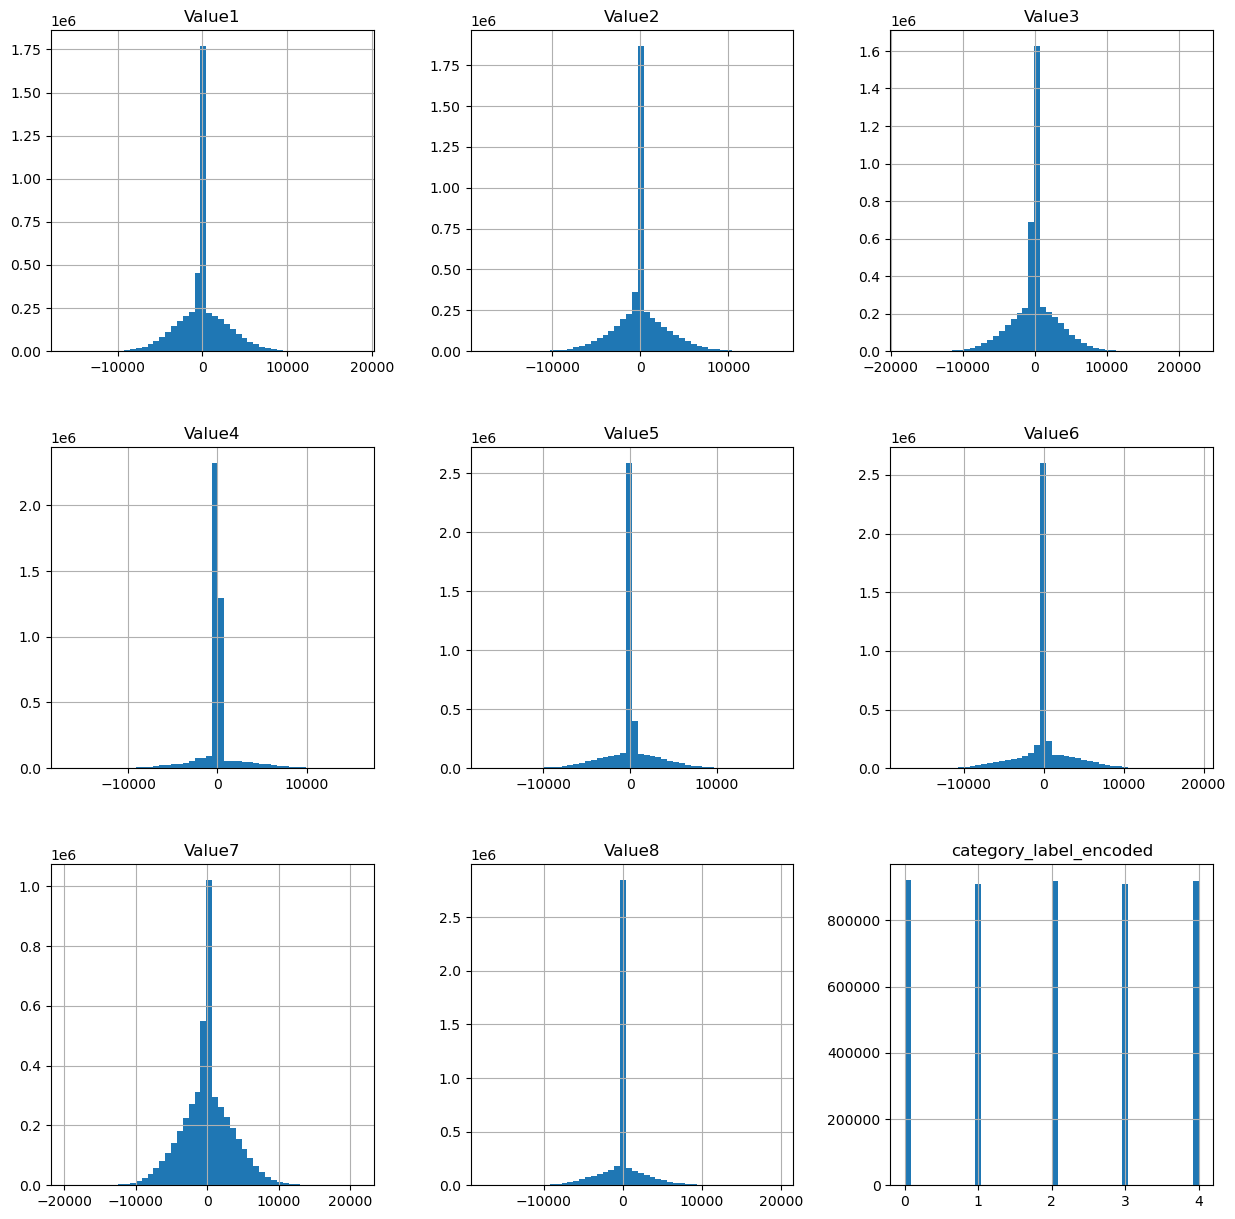

In [17]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [18]:
# Calculate summary statistics
summary_stats = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
skewness = data.skew()
kurtosis = data.kurtosis()
correlation_matrix = data.corr()

# Count missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Print or analyze the calculated statistics as needed
print(summary_stats)
print(skewness)
print(kurtosis)
print(correlation_matrix)
print(missing_values)
print(missing_percent)






             Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
10%   -3.186783e+03 -3.172807e+03 -3.558911e+03 -8.910837e+02 -2.609262e+03   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
90%    3.294596e+03  3.284134e+03  3.561534e+03  5.972634e+02  2.692637e+03   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  category_label_encoded  
count  4.576576e+06  4.576576e+06  4.576576e+06         

<Figure size 1200x800 with 0 Axes>

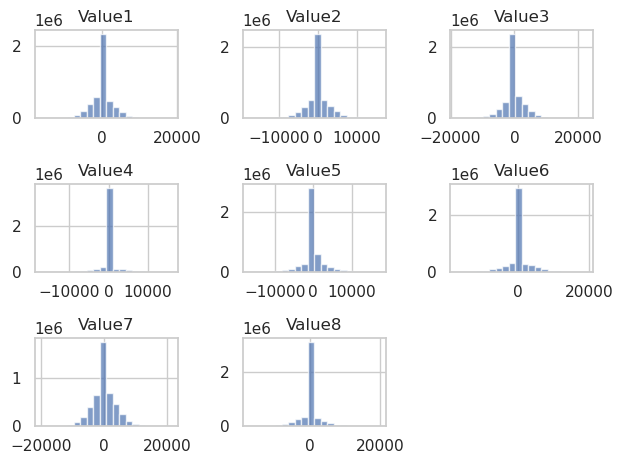

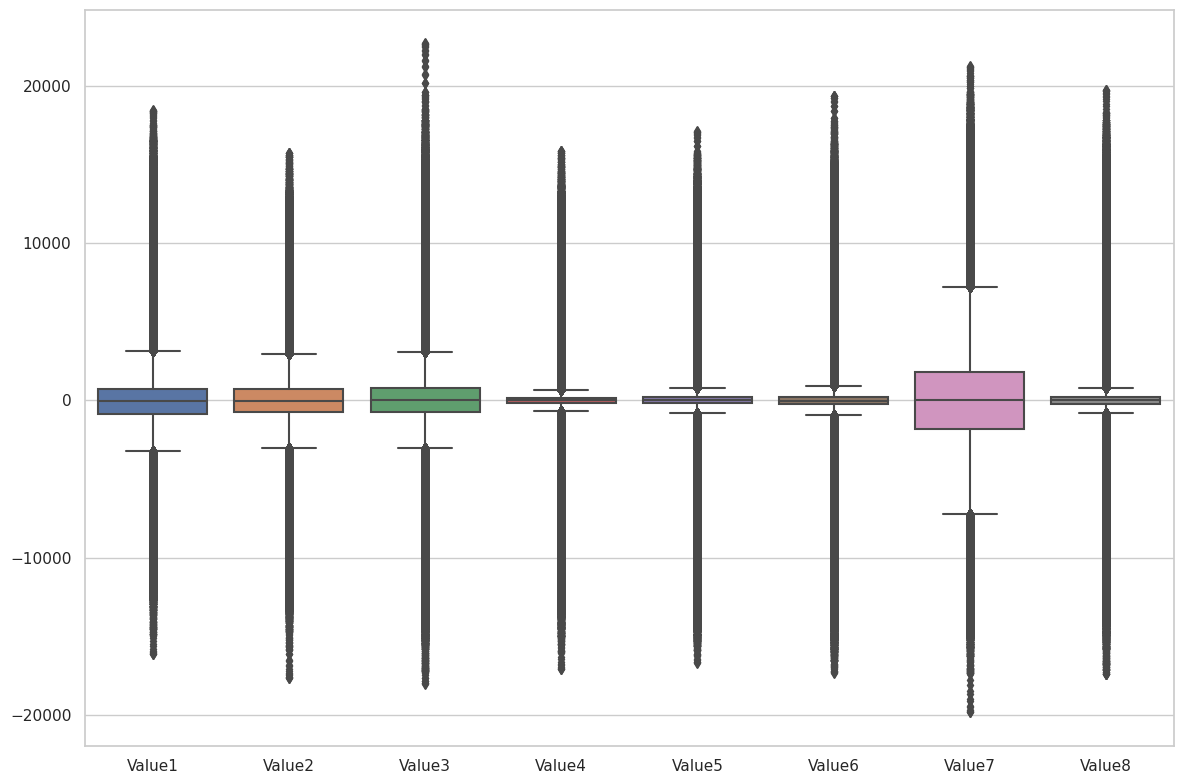

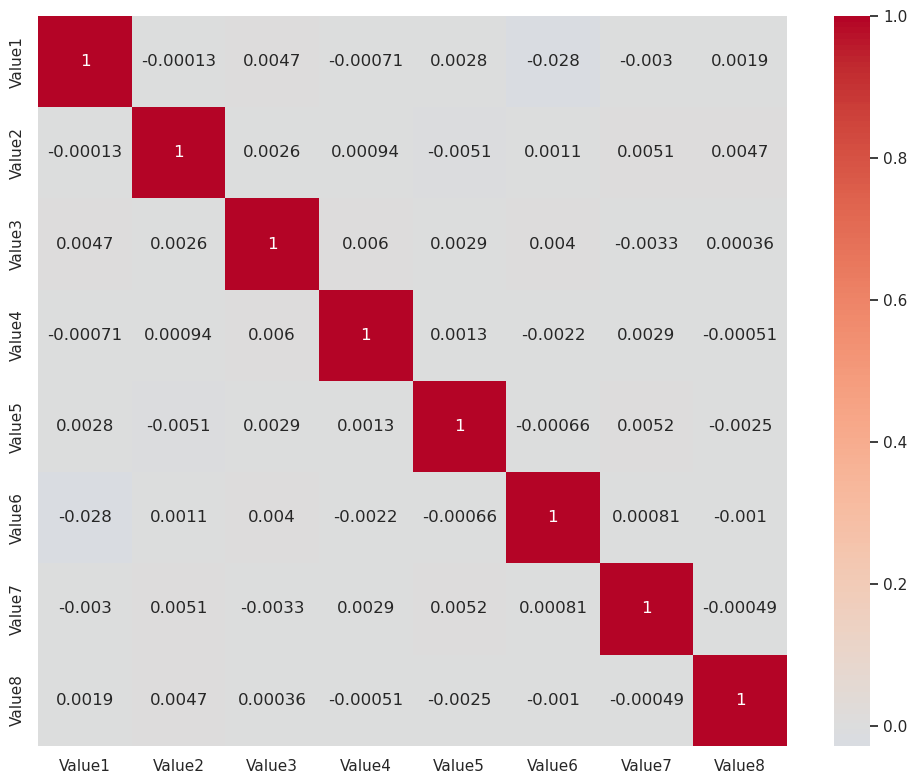

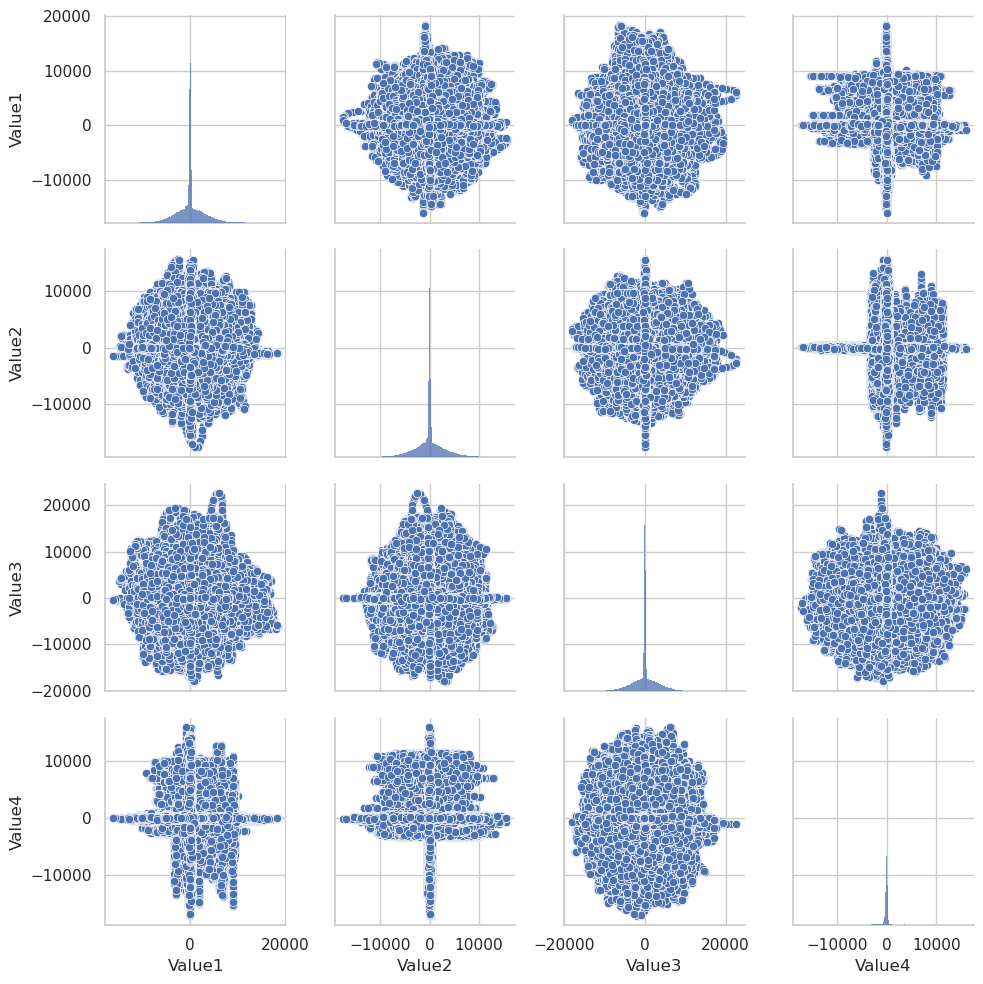

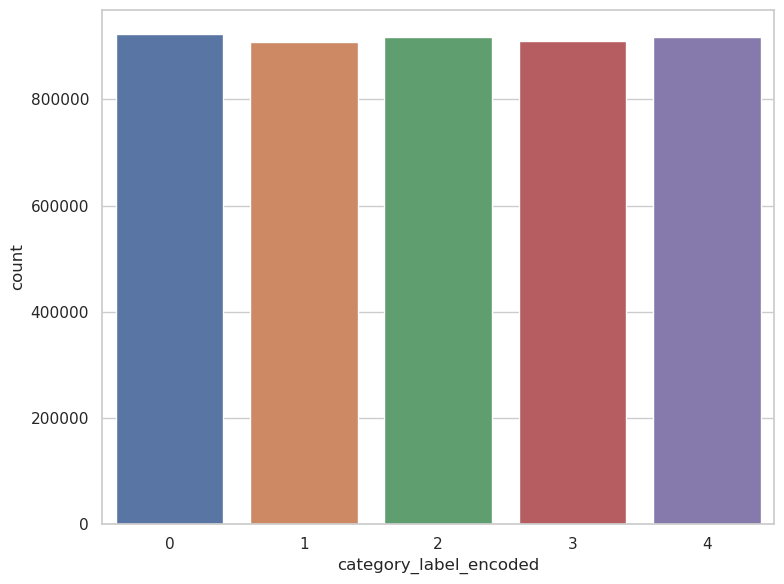

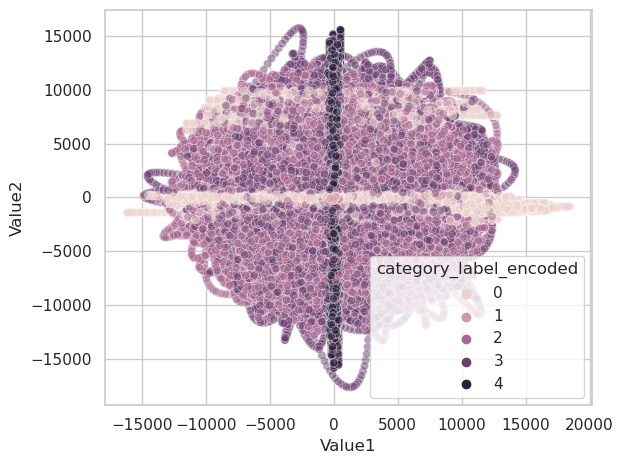

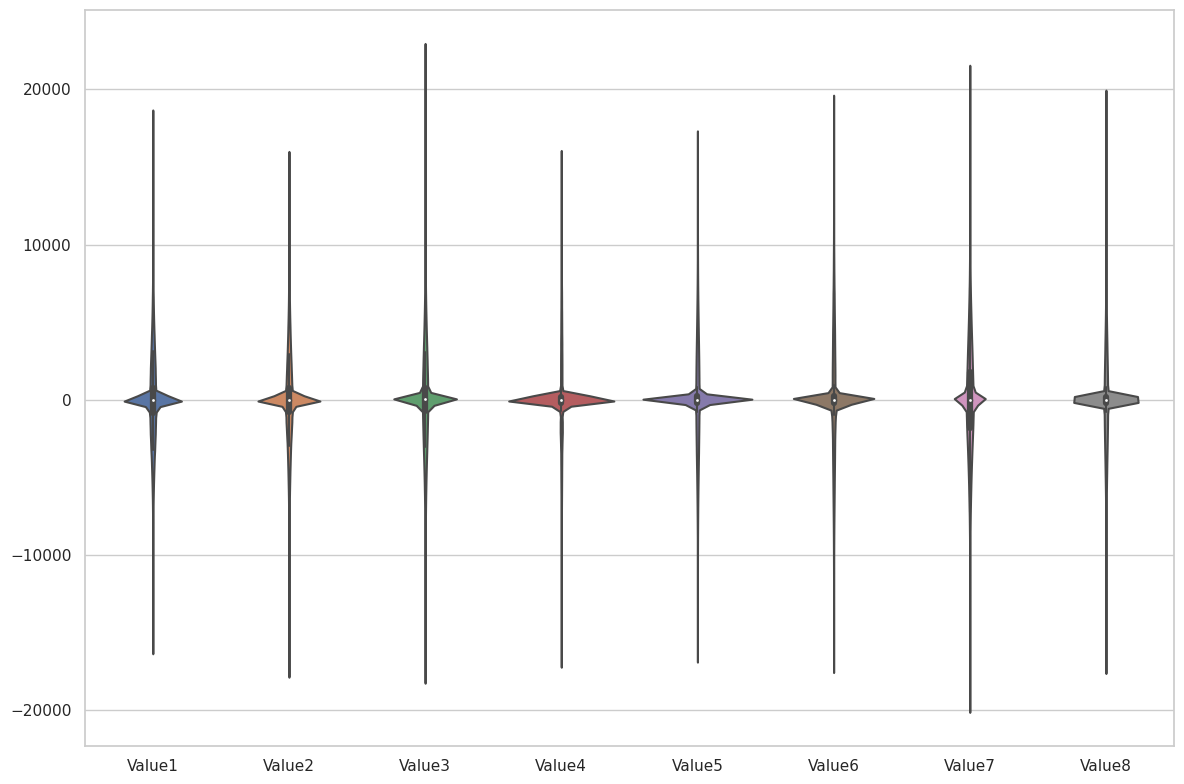

In [19]:


# Set style for Seaborn plots
sns.set(style="whitegrid")

# Histograms
numerical_columns = ['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8']
plt.figure(figsize=(12, 8))
data[numerical_columns].hist(bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

# Pair Plots (select a subset if there are too many variables)
sns.pairplot(data[numerical_columns[:4]])
plt.tight_layout()
plt.show()

# Bar Plots (for categorical variables)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category_label_encoded')
plt.tight_layout()
plt.show()

# Scatter Plots (for pairs of numerical variables)
sns.scatterplot(data=data, x='Value1', y='Value2', hue='category_label_encoded', alpha=0.5)
plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

# Time Series Plot (if applicable, assuming a time column named 'Time')
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=data, x='Time', y='Value1')
# plt.tight_layout()
# plt.show()


In [20]:
# Assuming you have already preprocessed your data and split it into X and y
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Standardize features (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Build DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Optionally, you can convert the predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)







Epoch 1/20
228829/228829 [==============================] - 534s 2ms/step - loss: 0.0590 - accuracy: 0.9764 - val_loss: 0.0512 - val_accuracy: 0.9791
Epoch 2/20
228829/228829 [==============================] - 513s 2ms/step - loss: 0.0490 - accuracy: 0.9798 - val_loss: 0.0475 - val_accuracy: 0.9805
Epoch 3/20
228829/228829 [==============================] - 504s 2ms/step - loss: 0.0478 - accuracy: 0.9802 - val_loss: 0.0475 - val_accuracy: 0.9802
Epoch 4/20
228829/228829 [==============================] - 515s 2ms/step - loss: 0.0471 - accuracy: 0.9805 - val_loss: 0.0462 - val_accuracy: 0.9810
Epoch 5/20
228829/228829 [==============================] - 532s 2ms/step - loss: 0.0466 - accuracy: 0.9808 - val_loss: 0.0458 - val_accuracy: 0.9811
Epoch 6/20
228829/228829 [==============================] - 527s 2ms/step - loss: 0.0463 - accuracy: 0.9809 - val_loss: 0.0460 - val_accuracy: 0.9814
Epoch 7/20
228829/228829 [==============================] - 508s 2ms/step - loss: 0.0460 - accuracy: